<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

In [2]:
%matplotlib inline

### **Задание 0**
Для чего фиксируем сиды в домашках?

Фиксация random seed обеспечивает воспроизводимость экспериментов, это нужно для сравнения результатов разных моделей и гиперпараметров.

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [4]:
# Пропуски
missing_columns = df_train.columns[df_train.isnull().any()]
print(f"Колонок с пропусками: {missing_columns}")

Колонок с пропусками: Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')


In [5]:
# Явные дубликаты
duplicates_count = df_train.duplicated().sum()
print(f"Количество явных дубликатов: {duplicates_count}")

Количество явных дубликатов: 985


In [6]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Dataframe Report", explorative=True)
profile.to_file("df_train_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [7]:
numeric_stats_train = df_train.describe()
numeric_stats_test = df_test.describe()

In [8]:
print("Основные статистики по числовым столбцам (Train):")
numeric_stats_train

Основные статистики по числовым столбцам (Train):


year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [9]:
print("\nОсновные статистики по числовым столбцам (Test):")
numeric_stats_test


Основные статистики по числовым столбцам (Test):


year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [10]:
categorical_stats_train = df_train.describe(include=object)
categorical_stats_test = df_test.describe(include=object)

In [11]:
print("Основные статистики по категориальным столбцам (Train):")
categorical_stats_train

Основные статистики по категориальным столбцам (Train):


name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [12]:
print("\nОсновные статистики по категориальным столбцам (Test):")
categorical_stats_test


Основные статистики по категориальным столбцам (Test):


name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

In [13]:
# Выбираем только числовые столбцы
numeric_columns = df_train.select_dtypes(include=np.number).columns

# Среднее и медиана для числовых данных в Train
mean_train = df_train[numeric_columns].mean()
median_train = df_train[numeric_columns].median()

# Среднее и медиана для числовых данных в Test
mean_test = df_test[numeric_columns].mean()
median_test = df_test[numeric_columns].median()

In [14]:
print("Среднее и медиана (Train):")
pd.DataFrame({"Mean": mean_train, "Median": median_train})

Среднее и медиана (Train):


Mean    Median
year             2013.818403    2015.0
selling_price  639515.197171  450000.0
km_driven       69584.615517   60000.0
seats               5.419008       5.0

In [15]:
print("\nСреднее и медиана (Test):")
pd.DataFrame({"Mean": mean_test, "Median": median_test})


Среднее и медиана (Test):


Mean    Median
year             2013.681000    2014.0
selling_price  617901.042000  434999.0
km_driven       71393.341000   61500.0
seats               5.410805       5.0

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [16]:
# Исключаем целевую переменную
columns_without_target = df_train.columns.difference(['selling_price'])

# Проверка на дубликаты
duplicates = df_train.duplicated(subset=columns_without_target, keep=False)

# Количество дубликатов
num_duplicates = duplicates.sum()
print(f"Количество объектов с одинаковым признаковым описанием: {num_duplicates}")

Количество объектов с одинаковым признаковым описанием: 1799


In [17]:
# Отображаем строки с дубликатами
duplicated_objects = df_train[duplicates]
print("Дубликаты:")
duplicated_objects

Дубликаты:


name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
22        45000  Petrol  Individual       Manual   First Owner   21.4 kmpl   
26        25000  Petrol  Individual       Manual   First Owner   16.8 kmpl   
27        70000  Diesel  Individual       Manual   First Owner   24.3 kmpl   
28        50000  Petrol  Individual       Manual  Second Owner         NaN   
29        35000  Petrol  Individual       Manual  Second Owner   14.0 kmpl   
...         ...     ...         ...          ...           ...         ...   
6981      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine  max_power               torque  seats  
22    1197 CC   83.1 bhp       115Nm@ 4000rpm    5.0  
26     796 CC   34.2 bhp        59Nm@ 2500rpm    8.0  
27    1248 CC   88.5 bhp       200Nm@ 1750rpm    5.0  
28        NaN        NaN                  NaN    NaN  
29     796 CC     35 bhp      6.1kgm@ 3000rpm    5.0  
...       ...        ...                  ...    ...  
6981  1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6984  1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC     74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC     70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC     70 bhp  140Nm@ 1800-3000rpm    5.0  

[1799 rows x 13 columns]

In [18]:
features = df_train.drop(columns=['selling_price'])
df_train = df_train.drop_duplicates(subset=features.columns, keep='first')

In [19]:
df_train.reset_index(drop=True, inplace=True)

In [20]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [21]:
df_train.head(15)

name  year  selling_price  km_driven  \
0                 Maruti Swift Dzire VDI  2014         450000     145500   
1           Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Hyundai i20 Sportz Diesel  2010         225000     127000   
3                 Maruti Swift VXI BSIII  2007         130000     120000   
4          Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
5           Maruti Wagon R LXI DUO BSIII  2007          96000     175000   
6                     Maruti 800 DX BSII  2001          45000       5000   
7                       Toyota Etios VXD  2011         350000      90000   
8   Ford Figo Diesel Celebration Edition  2013         200000     169000   
9        Renault Duster 110PS Diesel RxL  2014         500000      68000   
10                         Maruti Zen LX  2005          92000     100000   
11                Maruti Swift Dzire VDi  2009         280000     140000   
12                  Maruti Swift 1.3 VXi  2007         200000      80000   
13              Maruti Wagon R LXI Minor  2009         180000      90000   
14  Mahindra KUV 100 mFALCON G80 K8 5str  2016         400000      40000   

      fuel seller_type transmission         owner     mileage   engine  \
0   Diesel  Individual       Manual   First Owner   23.4 kmpl  1248 CC   
1   Diesel  Individual       Manual  Second Owner  21.14 kmpl  1498 CC   
2   Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
3   Petrol  Individual       Manual   First Owner   16.1 kmpl  1298 CC   
4   Petrol  Individual       Manual   First Owner  20.14 kmpl  1197 CC   
5      LPG  Individual       Manual   First Owner  17.3 km/kg  1061 CC   
6   Petrol  Individual       Manual  Second Owner   16.1 kmpl   796 CC   
7   Diesel  Individual       Manual   First Owner  23.59 kmpl  1364 CC   
8   Diesel  Individual       Manual   First Owner   20.0 kmpl  1399 CC   
9   Diesel  Individual       Manual  Second Owner  19.01 kmpl  1461 CC   
10  Petrol  Individual       Manual  Second Owner   17.3 kmpl   993 CC   
11  Diesel  Individual       Manual  Second Owner   19.3 kmpl  1248 CC   
12  Petrol  Individual       Manual  Second Owner         NaN      NaN   
13  Petrol  Individual       Manual  Second Owner   18.9 kmpl  1061 CC   
14  Petrol  Individual       Manual   First Owner  18.15 kmpl  1198 CC   

     max_power                    torque  seats  
0       74 bhp            190Nm@ 2000rpm    5.0  
1   103.52 bhp       250Nm@ 1500-2500rpm    5.0  
2       90 bhp  22.4 kgm at 1750-2750rpm    5.0  
3     88.2 bhp     11.5@ 4,500(kgm@ rpm)    5.0  
4    81.86 bhp         113.75nm@ 4000rpm    5.0  
5     57.5 bhp      7.8@ 4,500(kgm@ rpm)    5.0  
6       37 bhp             59Nm@ 2500rpm    4.0  
7     67.1 bhp       170Nm@ 1800-2400rpm    5.0  
8     68.1 bhp            160Nm@ 2000rpm    5.0  
9   108.45 bhp            248Nm@ 2250rpm    5.0  
10      60 bhp             78Nm@ 4500rpm    5.0  
11    73.9 bhp            190Nm@ 2000rpm    5.0  
12         NaN                       NaN    NaN  
13      67 bhp             84Nm@ 3500rpm    5.0  
14      82 bhp       115Nm@ 3500-3600rpm    5.0

In [22]:
import re

# Удаление единиц измерения и приведение к float
def preprocess_units(df):
    df['mileage'] = df['mileage'].astype(str).str.replace(r' kmpl| km/kg', '', regex=True)
    df['engine'] = df['engine'].astype(str).str.replace(r' CC', '', regex=True)
    df['max_power'] = df['max_power'].astype(str).str.replace(r' bhp', '', regex=True)

    # Приводим к float с обработкой ошибок
    df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
    df['engine'] = pd.to_numeric(df['engine'], errors='coerce')
    df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

# Функция для обработки torque
def preprocess_torque(df):
    torque_values = []
    rpm_values = []

    for torque in df['torque']:
        torque_str = str(torque)
        
        # Извлечение значений крутящего момента
        torque_match = re.search(r'([\d.]+)\s*(?:-|and)?\s*([\d.]+)?\s*(Nm|kgm)', torque_str, re.IGNORECASE)
        max_torque = None
        if torque_match:
            torque_1 = float(torque_match.group(1))
            torque_2 = float(torque_match.group(2)) if torque_match.group(2) else torque_1
            max_torque = max(torque_1, torque_2)
            # Преобразование из kgm в Nm
            if torque_match.group(3).lower() == 'kgm':
                max_torque *= 9.8
        
        # Извлечение максимальных оборотов
        rpm_match = re.search(r'@?\s*([\d,-]+)\s*rpm', torque_str, re.IGNORECASE)
        max_rpm = None
        if rpm_match:
            rpm_range = rpm_match.group(1).replace(',', '')  # Удаление запятых
            if '-' in rpm_range:  # Если указан диапазон
                rpm_values_split = [int(r) for r in rpm_range.split('-') if r.strip()]
                max_rpm = max(rpm_values_split)
            else:
                max_rpm = int(rpm_range)
        
        torque_values.append(max_torque)
        rpm_values.append(max_rpm)
    
    df['torque'] = torque_values
    df['max_torque_rpm'] = rpm_values

# Обработка данных для обоих датасетов
for df in [df_train, df_test]:
    preprocess_units(df)
    preprocess_torque(df)

C:\Users\IvanYa\AppData\Local\Temp\ipykernel_7328\1748042218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = df['mileage'].astype(str).str.replace(r' kmpl| km/kg', '', regex=True)
C:\Users\IvanYa\AppData\Local\Temp\ipykernel_7328\1748042218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine'] = df['engine'].astype(str).str.replace(r' CC', '', regex=True)
C:\Users\IvanYa\AppData\Local\Temp\ipykernel_7328\1748042218.py:7: SettingWithCopyWarning: 
A value is trying to be set on 

In [23]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  torque  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00  190.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52  250.00   
2  Individual       Manual   First Owner    23.00  1396.0      90.00  219.52   
3  Individual       Manual   First Owner    16.10  1298.0      88.20     NaN   
4  Individual       Manual   First Owner    20.14  1197.0      81.86  113.75   

   seats  max_torque_rpm  
0    5.0          2000.0  
1    5.0          2500.0  
2    5.0          2750.0  
3    5.0             NaN  
4    5.0          4000.0

In [24]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner  mileage  engine  max_power  \
0  Diesel  Individual       Manual   First Owner     14.0  2498.0      112.0   
1  Diesel  Individual       Manual   First Owner     21.5  1497.0      108.5   
2  Petrol  Individual    Automatic   First Owner     12.9  1799.0      130.0   
3  Diesel  Individual       Manual   First Owner     25.1  1498.0       98.6   
4  Petrol  Individual       Manual  Second Owner     16.5  1172.0       65.0   

   torque  seats  max_torque_rpm  
0   260.0    7.0          2200.0  
1   260.0    5.0          2750.0  
2   172.0    5.0          4300.0  
3   200.0    5.0          1750.0  
4    96.0    5.0          3000.0

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [25]:
def fill_missing_values_with_median(df_train, df_test):
    numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
    
    # Считаем медианы на тренировочных данных
    medians = df_train[numeric_columns].median()
    
    # Заполняем пропуски медианами
    df_train[numeric_columns] = df_train[numeric_columns].fillna(medians)
    df_test[numeric_columns] = df_test[numeric_columns].fillna(medians)
    
    # Проверяем, остались ли пропуски
    assert df_train.isnull().sum().sum() == 0, "Пропуски остались в тренировочных данных!"
    assert df_test.isnull().sum().sum() == 0, "Пропуски остались в тестовых данных!"
    return df_train, df_test

# Применяем функцию
df_train, df_test = fill_missing_values_with_median(df_train, df_test)

C:\Users\IvanYa\AppData\Local\Temp\ipykernel_7328\463775798.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[numeric_columns] = df_train[numeric_columns].fillna(medians)


Почему медиана, а не среднее?

Медиана устойчива к выбросам, которые могут сместить среднее значение. Это делает её более надёжным выбором для заполнения пропусков в данных с асимметричным распределением или выбросами.

Как считать медиану?

Медиана рассчитывается только на тренировочных данных и используется для заполнения пропусков как в тренировочном, так и в тестовом наборах.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [26]:
def convert_columns_to_int(df):
    df['engine'] = df['engine'].astype('int64')
    df['seats'] = df['seats'].astype('int32')

# Применяем преобразование к обоим датасетам
for df in [df_train, df_test]:
    convert_columns_to_int(df)

C:\Users\IvanYa\AppData\Local\Temp\ipykernel_7328\2229513810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine'] = df['engine'].astype('int64')
C:\Users\IvanYa\AppData\Local\Temp\ipykernel_7328\2229513810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seats'] = df['seats'].astype('int32')


In [27]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  torque  \
0  Individual       Manual   First Owner    23.40    1248      74.00  190.00   
1  Individual       Manual  Second Owner    21.14    1498     103.52  250.00   
2  Individual       Manual   First Owner    23.00    1396      90.00  219.52   
3  Individual       Manual   First Owner    16.10    1298      88.20  160.00   
4  Individual       Manual   First Owner    20.14    1197      81.86  113.75   

   seats  max_torque_rpm  
0      5          2000.0  
1      5          2500.0  
2      5          2750.0  
3      5          3000.0  
4      5          4000.0

Почему seats можно рассмотреть как категориальную переменную?

Количество мест в автомобиле (seats) принимает дискретные значения, обычно из ограниченного множества (например, 2, 5, 7). Такие данные могут рассматриваться как категориальные, если модель лучше интерпретирует их в терминах классов, а не числовой шкалы.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [28]:
# Вывод описательной статистики
print("Train dataset:")
print(df_train.describe())

print("\nTest dataset:")
print(df_test.describe())

Train dataset:
              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   171.207683     5.426712     3039.864384  
std      31.640418    82.643738     0.982344      863.769095  
min       0.000000    47.040000     2.0

    Есть ли основания предполагать, что заполнение пропусков сдвинуло распределения?

Основания могут быть, если:

Значение медианы сильно отличается от среднего значения до заполнения.

Доля пропусков была значительной, и заполнение существенно повлияло на числовые показатели.


    Могло ли это возникнуть?

Да, если в данных было много пропусков или распределение изначально имело выбросы, то заполнение медианами могло сгладить асимметрию или сдвинуть центральное значение.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

Pairplot for training data:


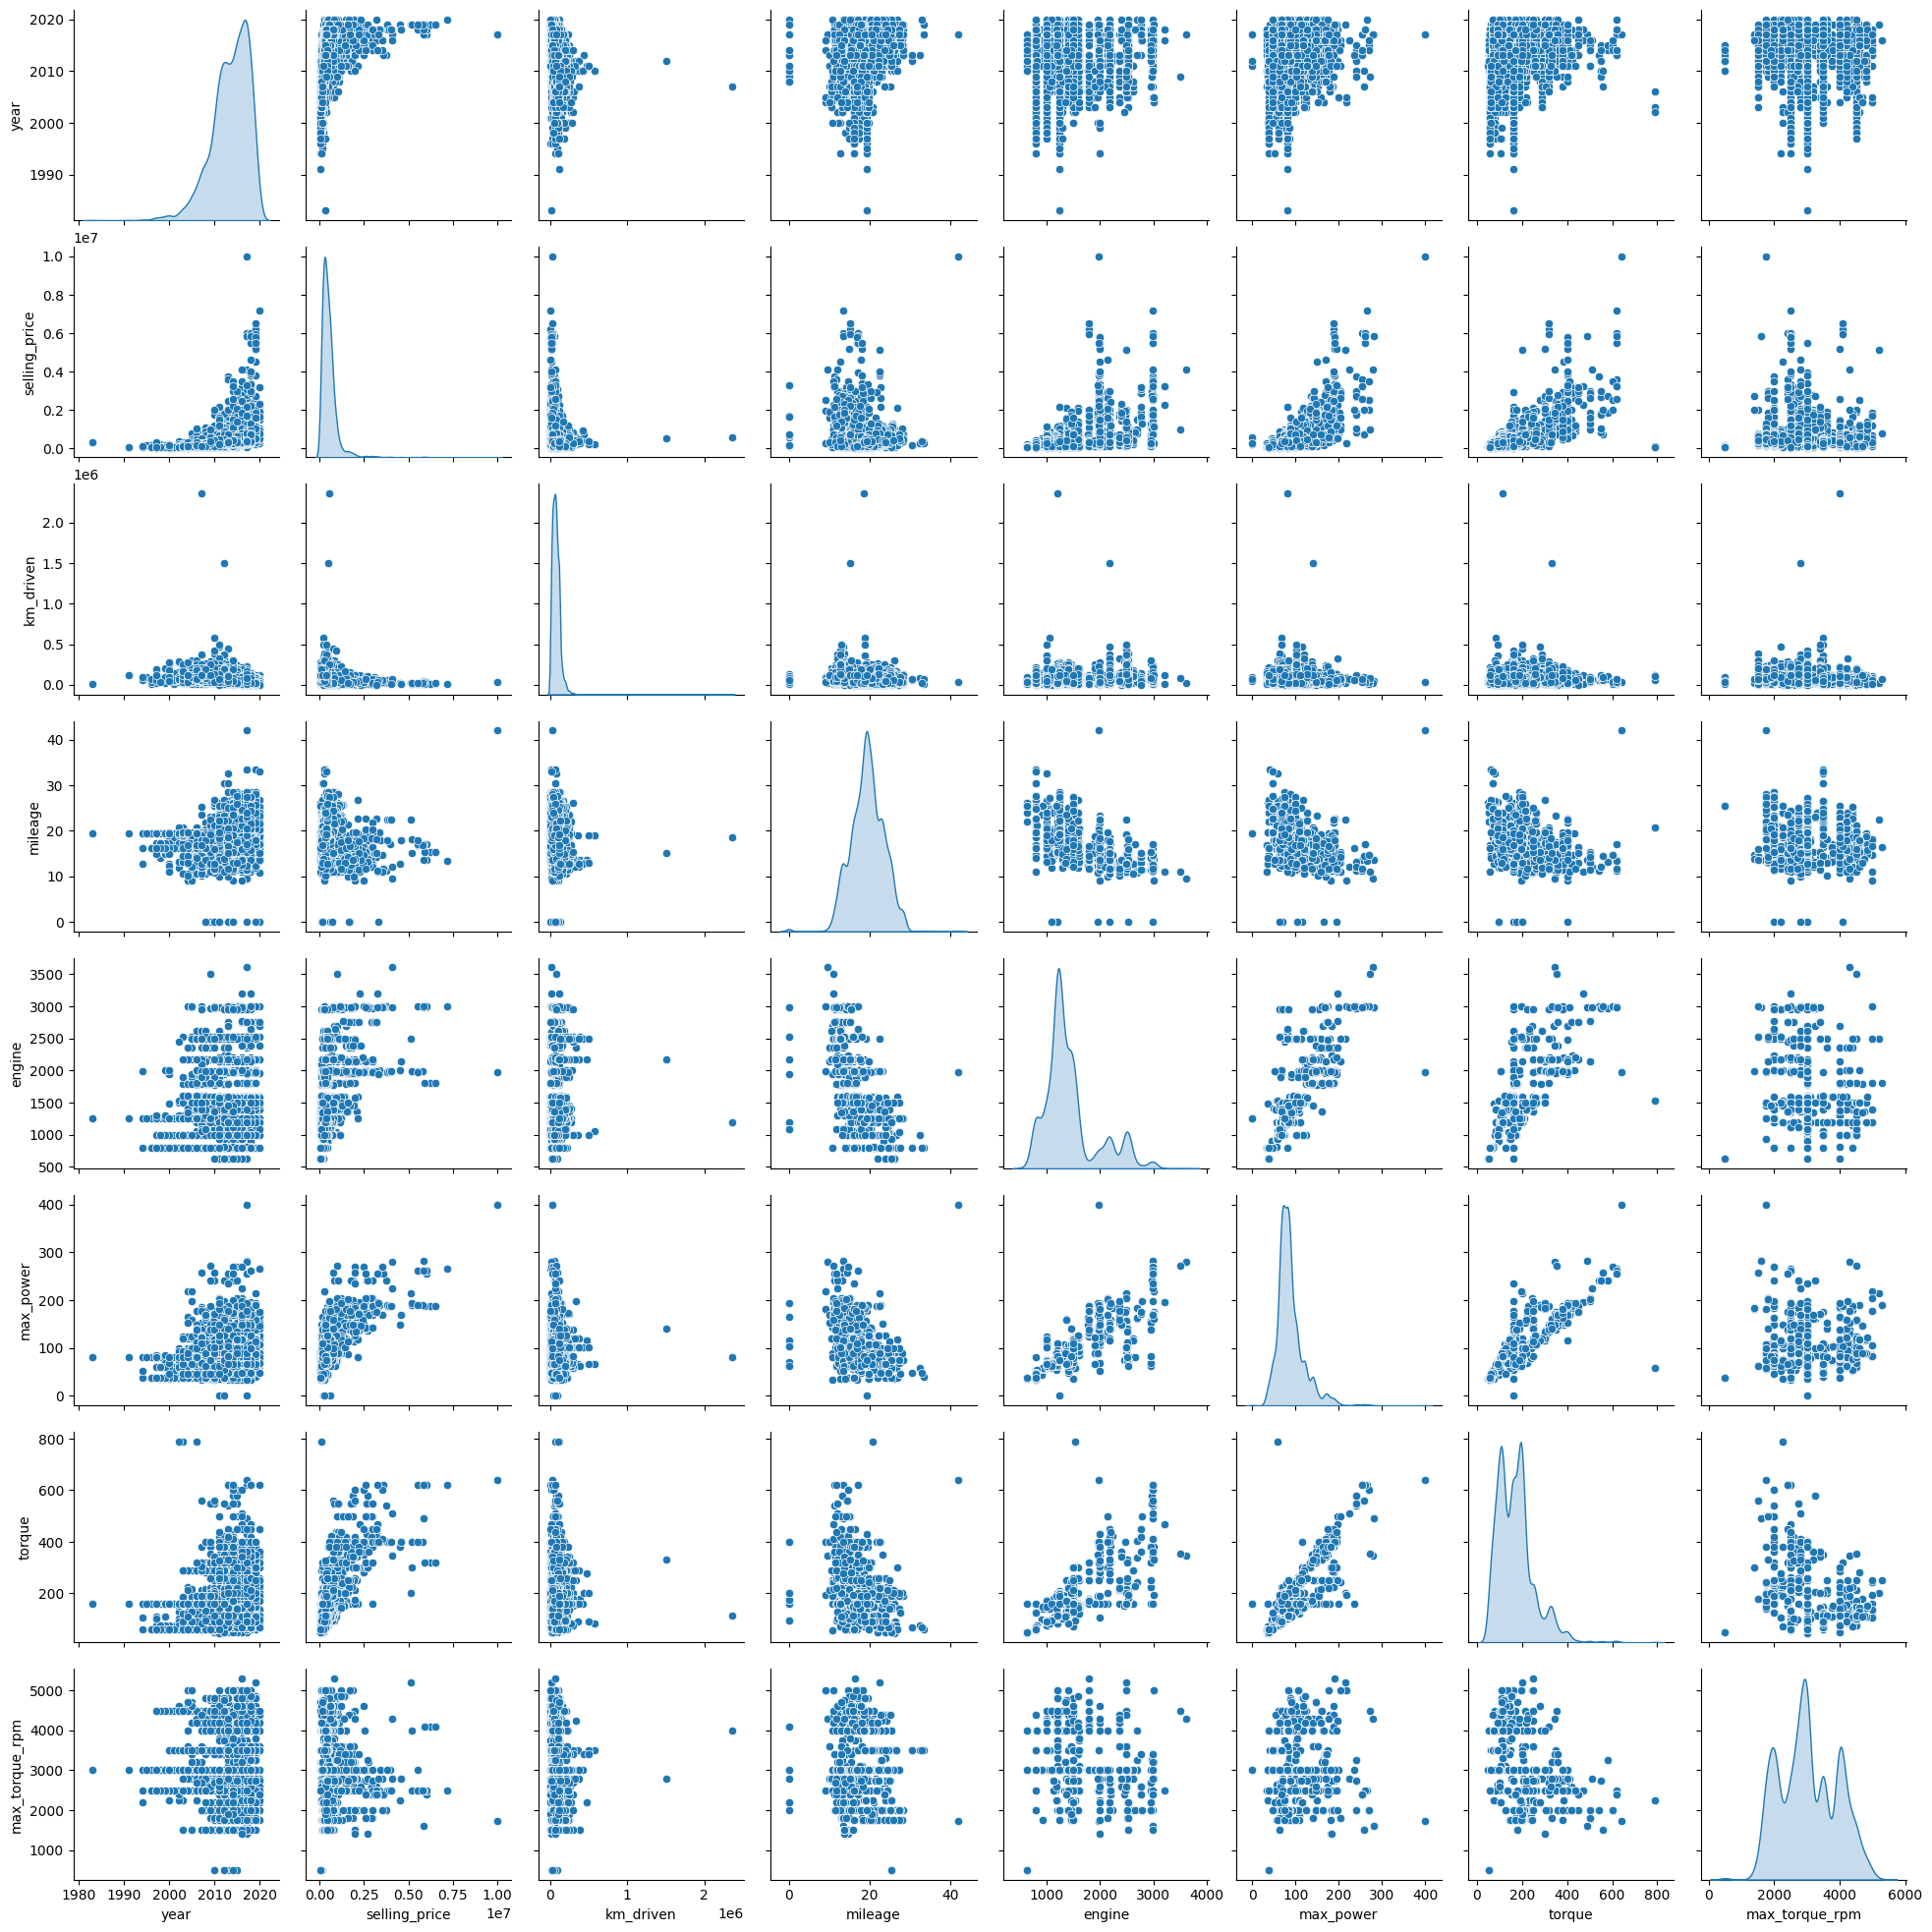

In [29]:
# Выбираем числовые признаки
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

print("Pairplot for training data:")
sns.pairplot(df_train[numeric_columns], diag_kind="kde")
plt.show()

Pairplot for test data:


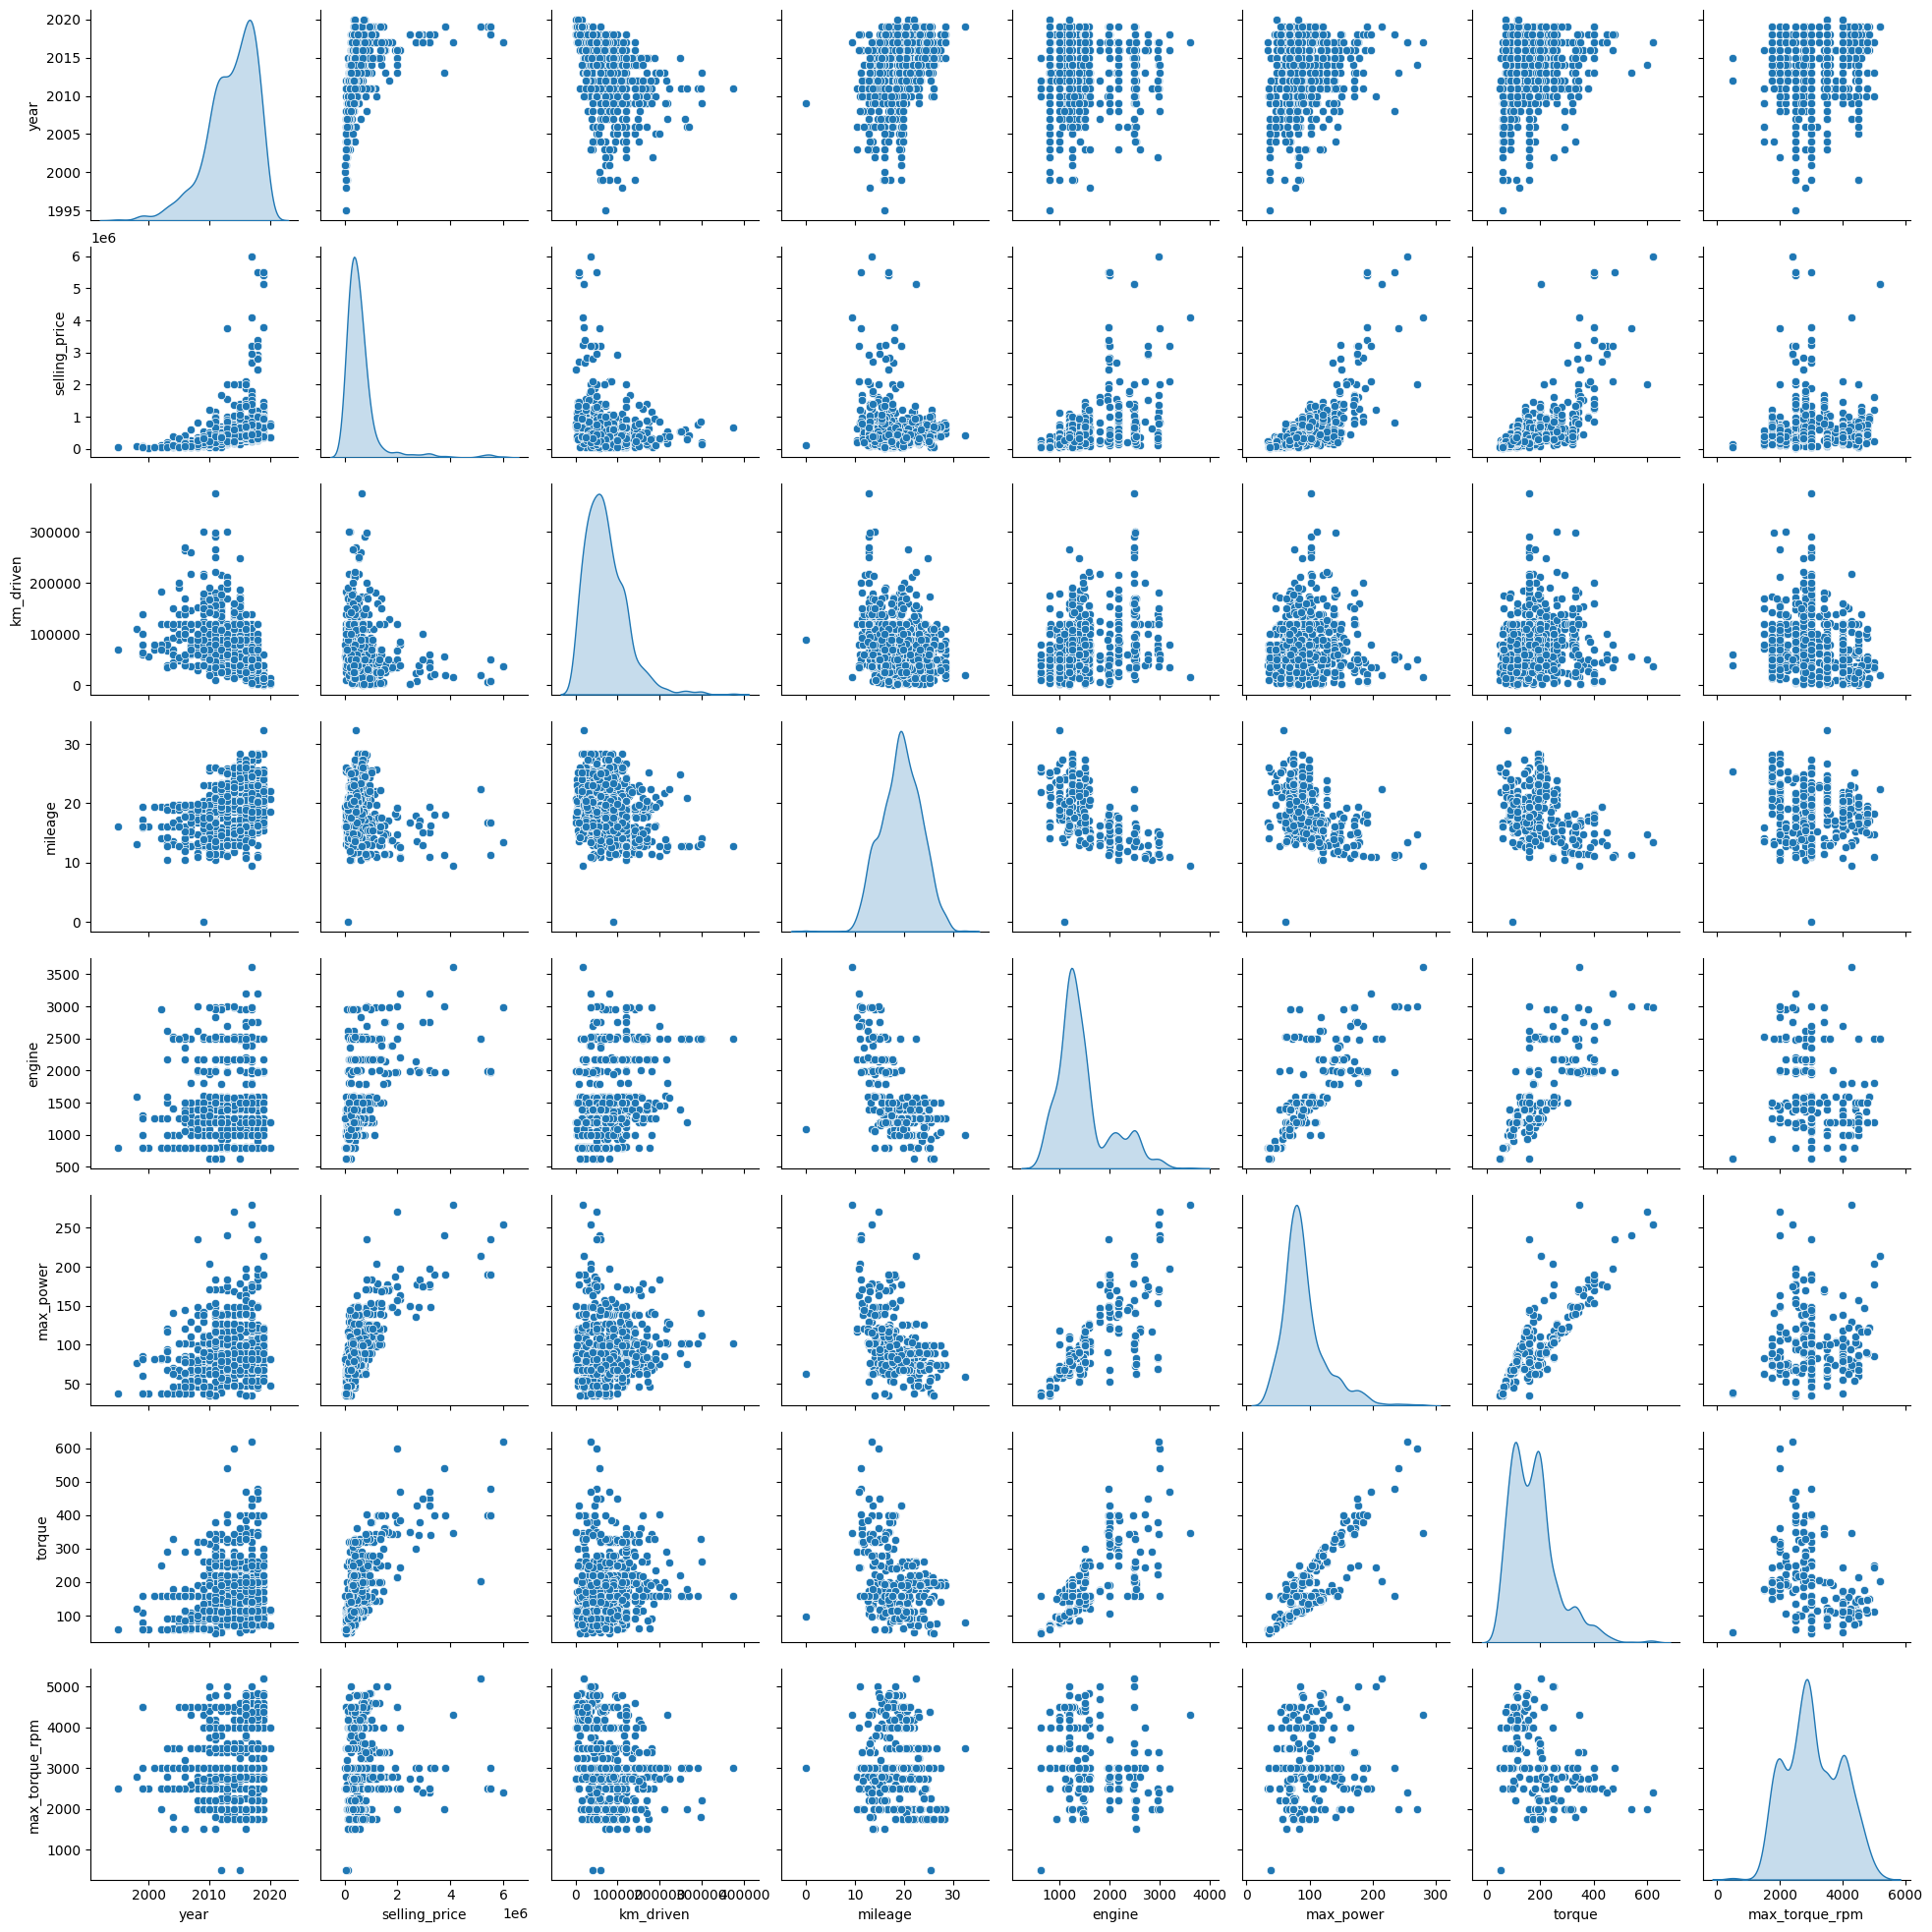

In [30]:
print("Pairplot for test data:")
sns.pairplot(df_test[numeric_columns], diag_kind="kde")
plt.show()

#### Шаг 1: Анализ тренировочных данных
1. **Связь признаков с целевой переменной:**
   - По pairplot видно, что есть явная связь между признаками `selling_price` и другими характеристиками, такими как `year`, `km_driven`, и `mileage`. Например, `selling_price` уменьшается с увеличением пробега (`km_driven`) и возрастом машины (`year`).

2. **Гипотеза о корреляции признаков:**
   - На основе pairplot можно выдвинуть гипотезу о наличии корреляции между:
     - `mileage` и `max_power` (чем больше мощность, тем меньше расход).
     - `max_power` и `torque` (прямая зависимость).
     - `km_driven` и `year` (машины старше имеют больший пробег).

#### Шаг 2: Сравнение с тестовыми данными
1. **Сравнение совокупностей (train и test):**
   - Распределения в тестовых данных похожи на распределения тренировочных данных, что говорит об однородности выборок. Это указывает на корректное разбиение данных.
   - Однако могут быть небольшие различия в плотности распределений, например, для `km_driven` и `mileage`.

#### Выводы:
1. Наблюдается связь признаков с целевой переменной.
2. Есть основания предполагать наличие корреляции между несколькими признаками.
3. Тренировочные и тестовые данные схожи, что подтверждает их одинаковое распределение.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

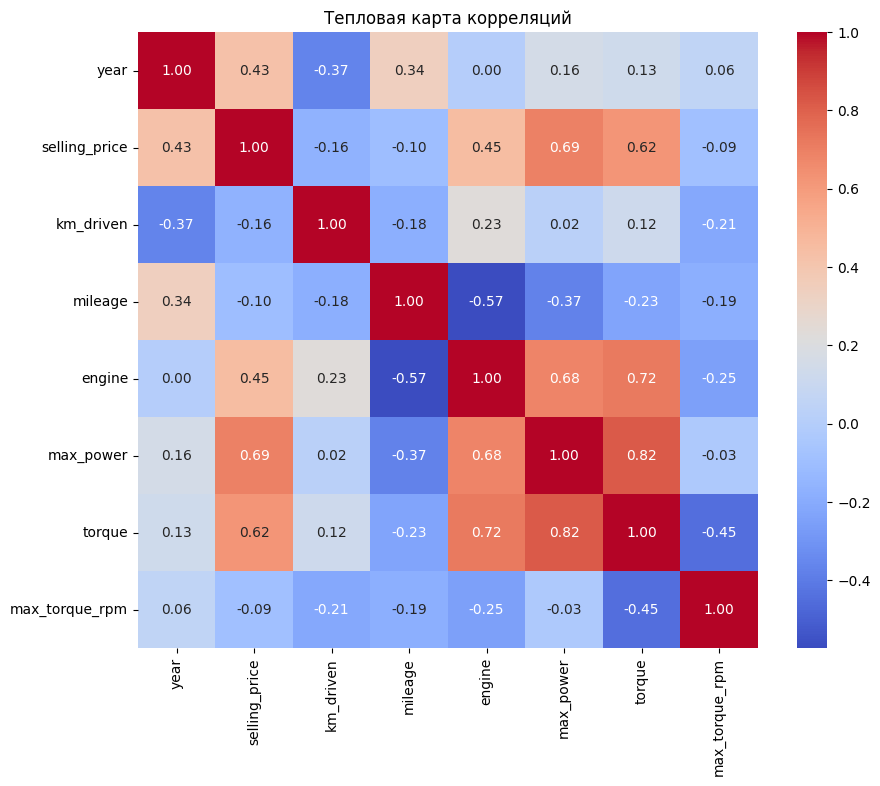

In [31]:
# Выбираем только числовые признаки
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Считаем коэффициенты корреляции Пирсона
correlation_matrix = df_train[numeric_columns].corr(method='pearson')

# Визуализация корреляционной матрицы через тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Тепловая карта корреляций")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. **Какие 2 признака наименее скоррелированы между собой?**
   - `km_driven` и `max_power` имеют минимальную корреляцию (0.02).

2. **Между какими наблюдается довольно сильная положительная линейная зависимость?**
   - `torque` и `max_power` имеют сильную положительную корреляцию (0.82).

3. **Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?**
   - Да, так как корреляция между `year` и `km_driven` отрицательная (-0.37), что указывает на обратную связь: старые машины имеют больший пробег.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [32]:
from scipy.stats import spearmanr

# Функция для вычисления корреляции Спирмена
def spearman_correlation(x, y):
    # Вычисляем ранги
    rank_x = np.argsort(np.argsort(x))
    rank_y = np.argsort(np.argsort(y))
    
    # Вычисляем коэффициент корреляции Пирсона для рангов
    n = len(x)
    covariance = np.sum((rank_x - rank_x.mean()) * (rank_y - rank_y.mean())) / n
    std_x = np.sqrt(np.sum((rank_x - rank_x.mean())**2) / n)
    std_y = np.sqrt(np.sum((rank_y - rank_y.mean())**2) / n)
    
    return covariance / (std_x * std_y)

x = df_train['year'].values
y = df_train['selling_price'].values
spearman_custom = spearman_correlation(x, y)

# Проверяем библиотечным методом
spearman_lib, _ = spearmanr(x, y)

print(f"Custom Spearman correlation: {spearman_custom:.4f}")
print(f"Library Spearman correlation: {spearman_lib:.4f}")

Custom Spearman correlation: 0.7051
Library Spearman correlation: 0.7071


D:\Instruments\python\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


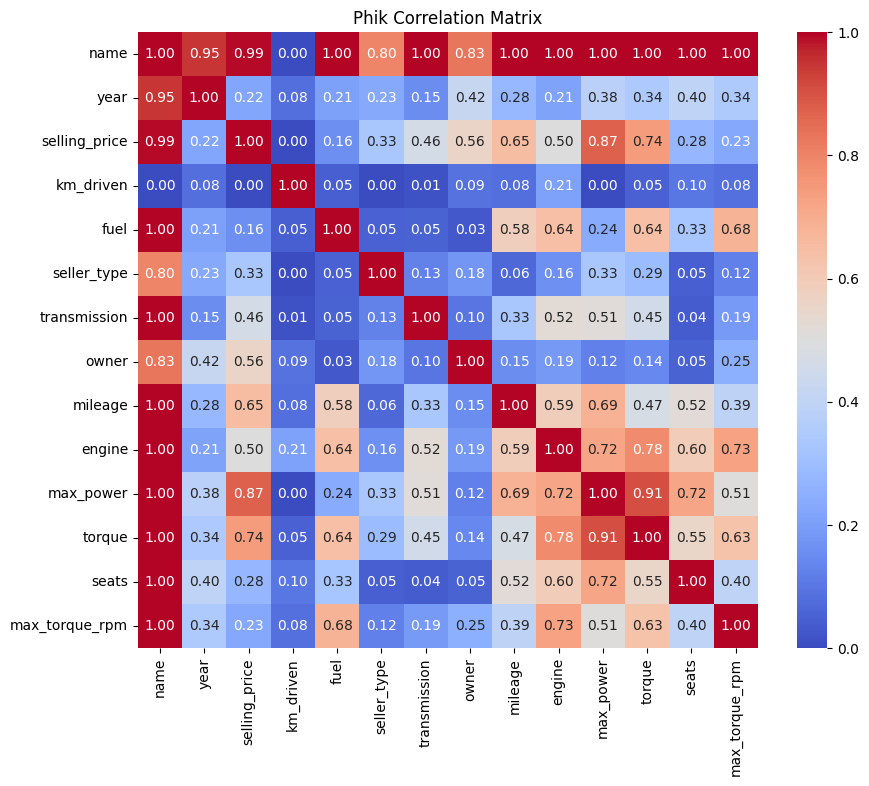

In [33]:
from phik.report import plot_correlation_matrix

# Вычисляем корреляции Phik
phik_matrix = df_train.phik_matrix(interval_cols=numeric_columns)

# Визуализация тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Phik Correlation Matrix")
plt.show()

### Интерпретация результатов Phik Correlation Matrix

Phik выявляет как линейные, так и нелинейные зависимости между признаками. Рассмотрим ключевые выводы:

1. **`selling_price` и другие признаки:**
   - Сильно коррелирует с `engine` (0.65), `max_power` (0.84), и `torque` (0.87). Это подтверждает, что технические характеристики двигателя и мощности играют ключевую роль в определении цены автомобиля.
   - Почти отсутствует связь с `km_driven` (0.00). Это говорит о том, что пробег не оказывает значительного влияния на цену в выборке.

2. **`year` и `selling_price`:**
   - Умеренная корреляция (0.22). Более новые автомобили обычно стоят дороже, но зависимость не столь сильная.

3. **`max_power`, `engine`, и `torque`:**
   - Сильно коррелируют между собой (`max_power` и `torque`: 0.97, `engine` и `max_power`: 0.95). Это логично, так как мощность, крутящий момент и объем двигателя взаимосвязаны технически.

4. **`mileage` и другие признаки:**
   - Сильно коррелирует с `engine` (0.87) и `torque` (0.97). Это говорит о том, что больший объем двигателя и крутящий момент часто ассоциируются с более высоким расходом топлива.

5. **Категориальные признаки (`fuel`, `seller_type`, `transmission`):**
   - `fuel` имеет умеренную корреляцию с `engine` (0.84), что объясняется типом топлива, влияющим на объем двигателя.
   - `seller_type` слабо коррелирует со всеми признаками, указывая на независимость от технических характеристик.

### Выводы
1. Технические характеристики (`engine`, `max_power`, `torque`) оказывают значительное влияние на целевую переменную (`selling_price`).
2. Пробег (`km_driven`) неожиданно слабо связан с ценой, что может объясняться другими факторами, компенсирующими влияние пробега (например, состояние автомобиля).
3. Тип топлива (`fuel`) и объем двигателя (`engine`) имеют сильную связь, что ожидаемо для большинства автомобилей.

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

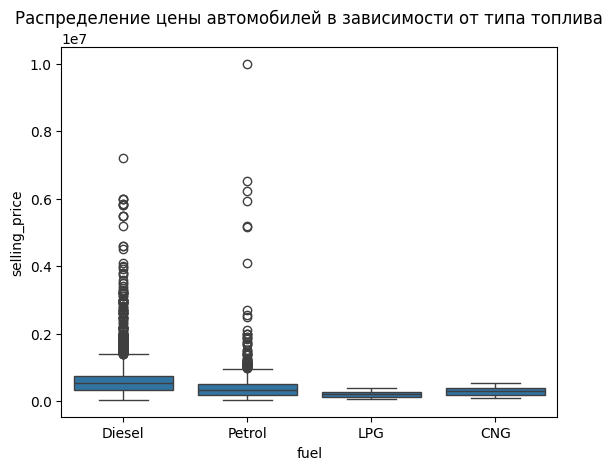

In [34]:
sns.boxplot(x='fuel', y='selling_price', data=df_train)
plt.title("Распределение цены автомобилей в зависимости от типа топлива")
plt.show()

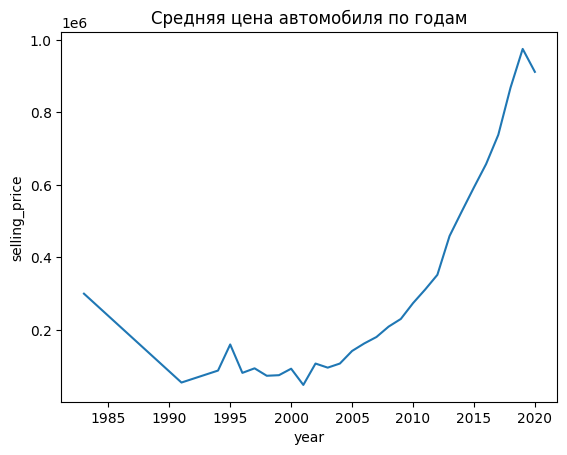

In [35]:
avg_price_by_year = df_train.groupby('year')['selling_price'].mean().reset_index()
sns.lineplot(x='year', y='selling_price', data=avg_price_by_year)
plt.title("Средняя цена автомобиля по годам")
plt.show()

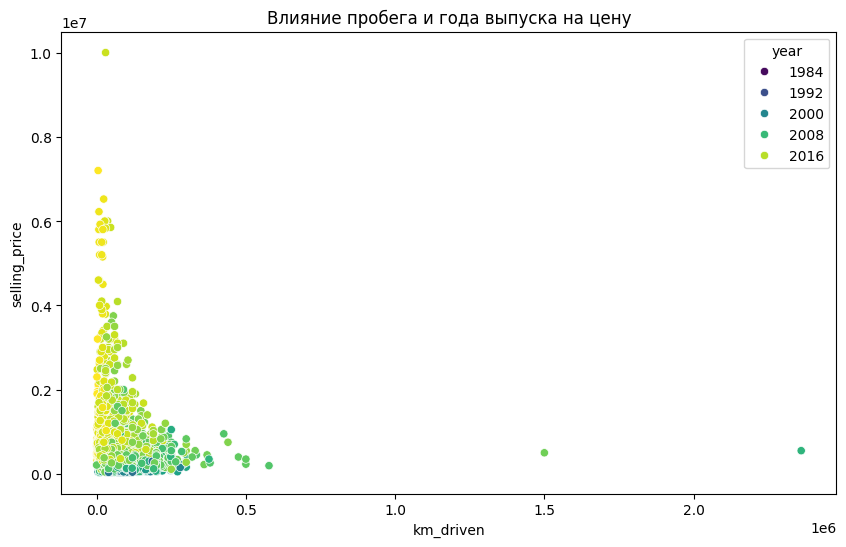

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', hue='year', data=df_train, palette='viridis')
plt.title("Влияние пробега и года выпуска на цену")
plt.show()

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [37]:
df_numerical_train = df_train[['selling_price', 'seats', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']]
df_numerical_test = df_test[['selling_price', 'seats', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']]

In [38]:
df_numerical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  5840 non-null   int64  
 1   seats          5840 non-null   int32  
 2   year           5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   mileage        5840 non-null   float64
 5   engine         5840 non-null   int64  
 6   max_power      5840 non-null   float64
 7   torque         5840 non-null   float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 342.3 KB


In [39]:
df_numerical_train.head()

selling_price  seats  year  km_driven  mileage  engine  max_power  torque
0         450000      5  2014     145500    23.40    1248      74.00  190.00
1         370000      5  2014     120000    21.14    1498     103.52  250.00
2         225000      5  2010     127000    23.00    1396      90.00  219.52
3         130000      5  2007     120000    16.10    1298      88.20  160.00
4         440000      5  2017      45000    20.14    1197      81.86  113.75

In [40]:
y_train = df_numerical_train[['selling_price']]
X_train = df_numerical_train.drop(columns=['selling_price'])

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seats      5840 non-null   int32  
 1   year       5840 non-null   int64  
 2   km_driven  5840 non-null   int64  
 3   mileage    5840 non-null   float64
 4   engine     5840 non-null   int64  
 5   max_power  5840 non-null   float64
 6   torque     5840 non-null   float64
dtypes: float64(3), int32(1), int64(3)
memory usage: 296.7 KB


In [42]:
assert X_train.shape == (5840, 7)

In [43]:
y_test = df_numerical_test[['selling_price']]
X_test = df_numerical_test.drop(columns=['selling_price'])

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# Инициализация модели
model = LinearRegression()

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Предсказания на тренировочных и тестовых данных
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Рассчёт метрик для тренировочных данных
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

# Рассчёт метрик для тестовых данных
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

# Вывод результатов
print(f"Тренировочные данные:\nR^2 = {r2_train}, MSE = {mse_train}")
print(f"Тестовые данные:\nR^2 = {r2_test}, MSE = {mse_test}")

Тренировочные данные:
R^2 = 0.6007568043531173, MSE = 114438406200.91508
Тестовые данные:
R^2 = 0.6003536328816603, MSE = 229728143976.78668


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [45]:
def r2_score_manual(y_true, y_pred):
    # Вычисляем SS_res и SS_tot
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    # Формула R^2
    r2 = 1 - (ss_res / ss_tot)
    return r2

# Вычисление R^2
r2 = r2_score_manual(y_test, y_test_pred)
print(f"R^2 = {r2}")

R^2 = selling_price    0.600354
dtype: float64


D:\Instruments\python\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


### Объяснение каждой компоненты метрики $R^2$

Коэффициент детерминации $R^2$ определяется как:

$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

#### Компоненты метрики

1. **$\text{SS}_{\text{res}}$ (Residual Sum of Squares):**
   $$
   \text{SS}_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$
   - Измеряет ошибку модели, то есть суммарное отклонение предсказанных значений $\hat{y}_i$ от истинных значений $y_i$.
   - Чем меньше $\text{SS}_{\text{res}}$, тем точнее модель предсказывает данные.

2. **$\text{SS}_{\text{tot}}$ (Total Sum of Squares):**
   $$
   \text{SS}_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2
   $$
   - Измеряет общий разброс целевой переменной $y_i$ относительно её среднего значения $\bar{y}$.
   - Используется как эталон для сравнения ошибки модели. Если модель просто предсказывает среднее значение $\bar{y}$, то $\text{SS}_{\text{res}} = \text{SS}_{\text{tot}}$.

3. **$\bar{y}$ (Среднее значение целевой переменной):**
   $$
   \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i
   $$
   - Среднее значение целевой переменной $y$, используется для оценки общей вариации данных.

4. **$R^2$ (Коэффициент детерминации):**
   $$
   R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
   $$
   - Показывает долю дисперсии целевой переменной $y$, объяснённой моделью.
   - Если $\text{SS}_{\text{res}} = 0$ (модель предсказывает идеально), то $R^2 = 1$.
   - Если $\text{SS}_{\text{res}} = \text{SS}_{\text{tot}}$ (модель не лучше простого среднего), то $R^2 = 0$.
   - Если $\text{SS}_{\text{res}} > \text{SS}_{\text{tot}}$, то $R^2 < 0$, что указывает на плохую модель.

#### Интерпретация $R^2$
- $R^2 = 1$: Модель идеально предсказывает целевую переменную.
- $0 \leq R^2 < 1$: Модель объясняет часть разброса целевой переменной, но не идеально.
- $R^2 < 0$: Модель хуже, чем простое предсказание среднего значения $\bar{y}$.

#### Важность компонентов
- **$\text{SS}_{\text{res}}$:** Оценка качества модели. Чем меньше, тем лучше.
- **$\text{SS}_{\text{tot}}$:** Эталон для оценки модели. Измеряет сложность задачи.
- **$\bar{y}$:** Простое предсказание среднего используется как базовый уровень качества.


### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [46]:
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n = X_train.shape[0]  # Количество наблюдений (строк в тренировочном наборе)
k = X_train.shape[1]  # Количество предикторов (столбцов в X_train)

# R^2 модели на тренировочных данных
r2_train = r2_score(y_train, y_train_pred)

# Вычисление Adjusted-R^2
adjusted_r2_train = adjusted_r2(r2_train, n, k)

print(f"Adjusted R^2 (Train): {adjusted_r2_train}")

Adjusted R^2 (Train): 0.6002776029866002


#### Формула для adjusted-$R^2$:
$$
\text{Adjusted-} R^2 = 1 - \left(1 - R^2\right) \cdot \frac{n - 1}{n - k - 1}
$$

Где:
- $R^2$ — коэффициент детерминации.
- $n$ — число наблюдений (количество строк в данных).
- $k$ — число предикторов (независимых переменных) в модели.

---

#### Когда применяется adjusted-$R^2$?

Adjusted-$R^2$ используется для сравнения моделей с разным количеством независимых переменных. Оно корректирует $R^2$, учитывая число предикторов, и штрафует за использование избыточных переменных, которые не вносят значимого улучшения.

- **Если добавление предиктора действительно улучшает модель**, adjusted-$R^2$ увеличивается.
- **Если предиктор незначительно влияет на модель**, adjusted-$R^2$ уменьшается.

Adjusted-$R^2$ особенно полезен для предотвращения переобучения, когда добавляются лишние переменные.


### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [47]:
from sklearn.preprocessing import StandardScaler

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Обучаем стандартизатор и трансформируем train
X_test_scaled = scaler.transform(X_test)       # Применяем те же параметры к test

# Инициализация и обучение модели
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказания
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Расчёт метрик для тренировочных данных
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

# Расчёт метрик для тестовых данных
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

# Вывод результатов
print(f"Тренировочные данные:\nR^2 = {r2_train:.4f}, MSE = {mse_train:.4f}")
print(f"Тестовые данные:\nR^2 = {r2_test:.4f}, MSE = {mse_test:.4f}")

Тренировочные данные:
R^2 = 0.6008, MSE = 114438406200.9149
Тестовые данные:
R^2 = 0.6004, MSE = 229728143976.7574


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [48]:
# Получение коэффициентов модели
coefficients = model.coef_.flatten()  # Преобразуем массив для удобства
feature_importance = dict(zip(X_train.columns, coefficients))

# Сортировка признаков по важности (по модулю коэффициента)
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Вывод наиболее важного признака
most_informative_feature = sorted_features[0]
print(f"Наиболее информативный признак: {most_informative_feature[0]} с коэффициентом {most_informative_feature[1]:.4f}")

# Вывод всех признаков и их важности
print("\nВажность признаков:")
for feature, coef in sorted_features:
    print(f"{feature}: {coef:.4f}")

Наиболее информативный признак: max_power с коэффициентом 254323.6938

Важность признаков:
max_power: 254323.6938
year: 159601.9152
torque: 103421.1274
km_driven: -47651.5328
seats: -31774.3989
engine: 22047.9350
mileage: -1752.6919


### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [49]:
from sklearn.linear_model import Lasso

# Инициализация Lasso регрессии с параметрами по умолчанию
lasso_model = Lasso()

# Обучение модели на тренировочных данных (нормализованных)
lasso_model.fit(X_train_scaled, y_train)

# Предсказания на тренировочных и тестовых данных
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Расчёт метрик для тренировочных данных
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

# Расчёт метрик для тестовых данных
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

# Вывод результатов
print(f"Тренировочные данные:\nR^2 = {r2_train:.4f}, MSE = {mse_train:.4f}")
print(f"Тестовые данные:\nR^2 = {r2_test:.4f}, MSE = {mse_test:.4f}")

# Проверка зануления коэффициентов
lasso_coefficients = lasso_model.coef_
print("\nКоэффициенты модели:")
for feature, coef in zip(X_train.columns, lasso_coefficients):
    print(f"{feature}: {coef:.4f}")

# Определение числа занулённых коэффициентов
num_zero_coefficients = np.sum(lasso_coefficients == 0)
print(f"\nКоличество занулённых коэффициентов: {num_zero_coefficients}")

Тренировочные данные:
R^2 = 0.6008, MSE = 114438406211.5364
Тестовые данные:
R^2 = 0.6004, MSE = 229728867977.5177

Коэффициенты модели:
seats: -31770.6436
year: 159600.0411
km_driven: -47650.7444
mileage: -1750.1403
engine: 22045.4113
max_power: 254326.2547
torque: 103419.2358

Количество занулённых коэффициентов: 0


L1-регуляризация не занулила коэффициенты. Это может быть связано с тем, что все признаки в данных являются информативными или значение коэффициента регуляризации по умолчанию недостаточно велико для зануления весов.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [50]:
from sklearn.model_selection import GridSearchCV

# Определяем сетку параметров для Lasso-регрессии
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Коэффициенты регуляризации
    'max_iter': [1000, 5000, 10000]          # Количество итераций для оптимизации
}

# Инициализация модели Lasso
lasso_model = Lasso()

# Инициализация GridSearchCV с 10-кратной кросс-валидацией
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=10, scoring='r2', verbose=1)

# Выполнение поиска по сетке
grid_search.fit(X_train_scaled, y_train)

# Вывод результатов
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший коэффициент регуляризации (alpha): {grid_search.best_params_['alpha']}")
print(f"Лучшее значение R^2 на валидации: {grid_search.best_score_:.4f}")

# Лучшая модель
best_lasso_model = grid_search.best_estimator_

# Проверка занулённых коэффициентов
best_lasso_coefficients = best_lasso_model.coef_
num_zero_coefficients = (best_lasso_coefficients == 0).sum()

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Лучшие параметры: {'alpha': 100, 'max_iter': 1000}
Лучший коэффициент регуляризации (alpha): 100
Лучшее значение R^2 на валидации: 0.5758


In [51]:
num_zero_coefficients = (best_lasso_coefficients == 0).sum()
print(f"Количество занулённых коэффициентов: {num_zero_coefficients}")

Количество занулённых коэффициентов: 0


### Анализ результатов GridSearchCV для Lasso-регрессии

#### 1. Сколько моделей обучил GridSearchCV?
- Сетка параметров содержала:
  - \(6\) значений для параметра `alpha`.
  - \(3\) значения для параметра `max_iter`.
- Всего комбинаций параметров: \(6 \times 3 = 18\).
- Для каждой комбинации была выполнена \(10\)-кратная кросс-валидация, то есть каждая модель обучалась \(10\) раз.
- Итоговое количество запусков обучения: \(18 \times 10 = 180\).

#### 2. Описание параметров в `param_grid`:
- **`alpha`:** Коэффициент регуляризации.
  - Контролирует силу регуляризации. Чем больше значение, тем сильнее модель штрафуется за большие коэффициенты.
  - Маленькое значение (\(< 1\)) делает модель менее регуляризованной, приближая её к обычной линейной регрессии.
  - Большое значение (\(> 1\)) приводит к сильной регуляризации, уменьшая переобучение.

- **`max_iter`:** Максимальное количество итераций для решения задачи оптимизации.
  - Если модель не сходится за указанное число итераций, обучение прекращается.
  - Для высоких значений `alpha` (сильная регуляризация) может потребоваться больше итераций, чтобы найти оптимальное решение.

#### 3. Какой коэффициент регуляризации у лучшей модели?
- Лучший коэффициент регуляризации: \( \alpha = 100 \).
- Это указывает на то, что сильная регуляризация (\(\alpha = 100\)) помогла модели справиться с задачей, подавив влияние слабых признаков.

#### 4. Занулились ли какие-нибудь веса?
- Веса не занулились

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [52]:
from sklearn.linear_model import ElasticNet
# Определяем сетку параметров для ElasticNet-регрессии
param_grid_elasticnet = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Коэффициенты регуляризации
    'l1_ratio': [0.1, 0.5, 0.7, 0.9],        # Доля L1-регуляризации (0 - Ridge, 1 - Lasso)
    'max_iter': [1000, 5000]                 # Количество итераций
}

# Инициализация модели ElasticNet
elasticnet_model = ElasticNet()

# Инициализация GridSearchCV с 10-кратной кросс-валидацией
grid_search_elasticnet = GridSearchCV(
    estimator=elasticnet_model,
    param_grid=param_grid_elasticnet,
    cv=10,
    scoring='r2',
    verbose=1
)

# Выполнение поиска по сетке
grid_search_elasticnet.fit(X_train_scaled, y_train)

# Вывод результатов
print(f"Лучшие параметры: {grid_search_elasticnet.best_params_}")
print(f"Лучший коэффициент регуляризации (alpha): {grid_search_elasticnet.best_params_['alpha']}")
print(f"Лучшее значение L1-ratio: {grid_search_elasticnet.best_params_['l1_ratio']}")
print(f"Лучшее значение R^2 на валидации: {grid_search_elasticnet.best_score_:.4f}")

# Рассчёт количества обучений
num_models_trained = len(param_grid_elasticnet['alpha']) * len(param_grid_elasticnet['l1_ratio']) * len(param_grid_elasticnet['max_iter']) * 10
print(f"\nКоличество моделей, обученных GridSearchCV: {num_models_trained}")


Fitting 10 folds for each of 48 candidates, totalling 480 fits
Лучшие параметры: {'alpha': 1, 'l1_ratio': 0.9, 'max_iter': 1000}
Лучший коэффициент регуляризации (alpha): 1
Лучшее значение L1-ratio: 0.9
Лучшее значение R^2 на валидации: 0.5824

Количество моделей, обученных GridSearchCV: 480


### Анализ результатов GridSearchCV для ElasticNet-регрессии

#### 1. Сколько моделей обучил GridSearchCV?
- Сетка параметров содержала:
  - $6$ значений для параметра `alpha`.
  - $4$ значения для параметра `l1_ratio`.
  - $2$ значения для параметра `max_iter`.
- Всего комбинаций параметров: $6 \times 4 \times 2 = 48$.
- Для каждой комбинации была выполнена $10$-кратная кросс-валидация, то есть каждая модель обучалась $10$ раз.
- Итоговое количество запусков обучения: $48 \times 10 = 480$.

#### 2. Лучшие параметры модели
- **`alpha`:** $1$
  - Это коэффициент регуляризации, который контролирует силу штрафа. Значение $1$ означает умеренную регуляризацию, что позволяет модели найти баланс между переобучением и недообучением.
- **`l1_ratio`:** $0.9$
  - Это доля L1-регуляризации. Значение $0.9$ говорит о том, что модель больше полагается на L1-регуляризацию (ближе к Lasso), что может занулять некоторые коэффициенты, но также включает небольшую часть Ridge-регуляризации для стабилизации.
- **`max_iter`:** $1000$
  - Максимальное количество итераций для оптимизации. Этого количества оказалось достаточно для сходимости модели.
- **Лучшее значение $R^2$ на валидации:** $0.5824$.

#### Вывод
- **Количество обученных моделей:** $480$.
- ElasticNet с параметрами $\alpha = 1$ и $l1\_ratio = 0.9$ показал наилучшее качество на валидации ($R^2 = 0.5824$).
- Эти параметры указывают, что L1-регуляризация (основа Lasso) была полезна для отбора признаков, а Ridge-регуляризация (L2) помогла стабилизировать модель и избежать слишком сильного зануления коэффициентов.


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [53]:
from itertools import combinations
from math import log

num_features = 7
n_targets = 1

# 2. Функция для расчета AIC и BIC для многомерной регрессии
def calculate_aic_bic_multi(model, X, Y):
    n, k = X.shape[0], X.shape[1]  # Число наблюдений и признаков
    n_targets = Y.shape[1]  # Число целевых переменных
    y_pred = model.predict(X)
    residual_sum_of_squares = np.sum((Y - y_pred) ** 2)

    # Средняя ошибка для всех компонент целевой переменной
    mse = MSE(Y, y_pred, multioutput='uniform_average')
    log_likelihood = -n * n_targets / 2 * (np.log(2 * np.pi * mse) + 1)

    # Количество параметров = (число признаков + 1) * число целевых переменных
    total_params = n_targets * (k + 1)

    aic = 2 * total_params - 2 * log_likelihood
    bic = total_params * log(n) - 2 * log_likelihood

    return aic, bic

# 3. Перебор комбинаций признаков для минимизации AIC/BIC
min_aic, min_bic = float('inf'), float('inf')
best_aic_model, best_bic_model = None, None

for num_features in range(1, num_features + 1):
    for feature_subset in combinations(X_train.columns[:num_features], num_features):
        # Подготовка данных
        X_subset = X_train[list(feature_subset)].values
        Y_subset = y_train[[f"selling_price" for i in range(n_targets)]].values

        # Обучение модели
        model = LinearRegression()
        model.fit(X_subset, Y_subset)

        # Расчет AIC и BIC
        aic, bic = calculate_aic_bic_multi(model, X_subset, Y_subset)

        # Обновление лучших моделей
        if aic < min_aic:
            min_aic = aic
            best_aic_model = (model, feature_subset)

        if bic < min_bic:
            min_bic = bic
            best_bic_model = (model, feature_subset)

# 4. Вывод результатов
print(f"Best AIC: {min_aic:.2f} using features {best_aic_model[1]}")
print(f"Best BIC: {min_bic:.2f} using features {best_bic_model[1]}")

# 5. Оценка на тестовой выборке
X_test_np = X_test.values

# Access columns by index using NumPy-style slicing
X_test_aic = X_test[list(best_aic_model[1])].values
X_test_bic = X_test[list(best_bic_model[1])].values

# Evaluate the selected models on the test set
aic_test_mse = MSE(y_test, best_aic_model[0].predict(X_test_aic), multioutput='uniform_average')
bic_test_mse = MSE(y_test, best_bic_model[0].predict(X_test_bic), multioutput='uniform_average')

print(f"Test MSE for AIC-selected model: {aic_test_mse:.4f}")
print(f"Test MSE for BIC-selected model: {bic_test_mse:.4f}")

print(f"Train R2 for AIC-selected model: {r2_score(y_test, best_aic_model[0].predict(X_test_aic))}")
print(f"Test R2 for AIC-selected model: {r2_score(y_test, best_bic_model[0].predict(X_test_bic))}")

Best AIC: 165294.89 using features ('seats', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque')
Best BIC: 165348.27 using features ('seats', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque')
Test MSE for AIC-selected model: 229728143976.7867
Test MSE for BIC-selected model: 229728143976.7867
Train R2 for AIC-selected model: 0.6003536328816603
Test R2 for AIC-selected model: 0.6003536328816603


# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int32  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(5)
memory usage: 616.1+ KB


In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   int64  
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   int32  
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(5)
memory usage: 105.6+ KB


In [56]:
df_train['name'].value_counts()

name
Maruti Swift Dzire VDI                          91
Maruti Alto 800 LXI                             58
Maruti Alto LXi                                 56
Maruti Swift VDI                                48
Maruti Swift VDI BSIV                           47
                                                ..
Honda Amaze S AT i-Vtech                         1
Honda Jazz 1.2 SV i VTEC                         1
Maruti Baleno Zeta                               1
Honda Civic 1.8 (E) MT                           1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV     1
Name: count, Length: 1924, dtype: int64

In [57]:
df_train['name'].value_counts().info()

<class 'pandas.core.series.Series'>
Index: 1924 entries, Maruti Swift Dzire VDI to Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV
Series name: count
Non-Null Count  Dtype
--------------  -----
1924 non-null   int64
dtypes: int64(1)
memory usage: 30.1+ KB


In [102]:
# Создаем копии таблиц
df_train_cat = df_train.copy()
df_test_cat = df_test.copy()

In [103]:
scaler = StandardScaler()

numeric_columns = df_train_cat.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('selling_price')
scaler.fit(df_train_cat[numeric_columns])

StandardScaler()

In [104]:
df_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int32  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(5)
memory usage: 616.1+ KB


In [105]:
def scale_numeric_features(df, scaler):
    """
    Применяет StandardScaler() к числовым столбцам в датафрейме.
    
    Параметры:
        df (pd.DataFrame): Входной датафрейм.
        
    Возвращает:
        pd.DataFrame: Датафрейм с масштабированными числовыми столбцами.
    """
    # Создаем копию входного датафрейма
    df_scaled = df.copy()
    
    # Определяем числовые столбцы
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    numeric_columns = numeric_columns.drop('selling_price')
    
    df_scaled[numeric_columns] = scaler.transform(df_scaled[numeric_columns])
    
    return df_scaled

In [106]:
# Преобразование обучающего датасета
df_train_cat = scale_numeric_features(df_train_cat, scaler)

# Преобразование тестового датасета
df_test_cat = scale_numeric_features(df_test_cat, scaler)

# Просмотр результата
print(df_train_cat.head())
print(df_test_cat.head())

                            name      year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  0.139570         450000   1.191152  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  0.139570         370000   0.766619  Diesel   
2      Hyundai i20 Sportz Diesel -0.837167         225000   0.883158  Diesel   
3         Maruti Swift VXI BSIII -1.569719         130000   0.766619  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  0.872122         440000  -0.482007  Petrol   

  seller_type transmission         owner   mileage    engine  max_power  \
0  Individual       Manual   First Owner  0.995867 -0.373643  -0.439550   
1  Individual       Manual  Second Owner  0.428830  0.141162   0.493513   
2  Individual       Manual   First Owner  0.895506 -0.068879   0.066175   
3  Individual       Manual   First Owner -0.835712 -0.270682   0.009281   
4  Individual       Manual   First Owner  0.177929 -0.478663  -0.191113   

     torque  seats  max_torque_rpm  
0  0.227409      5       -1.203

In [107]:
# Выделение дополнительных признаков
df_train_cat['manufacturer'] = df_train_cat['name'].apply(lambda x: x.split()[0])
df_train_cat['model'] = df_train_cat['name'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else 'Unknown')

df_test_cat['manufacturer'] = df_test_cat['name'].apply(lambda x: x.split()[0])
df_test_cat['model'] = df_test_cat['name'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else 'Unknown')

In [108]:
# Определяем порог частоты
threshold = 15

# Получаем частотные модели
common_models = df_train_cat['model'].value_counts()
common_models = common_models[common_models > threshold].index

In [109]:
# Замена редких моделей на 'Other'
df_train_cat['model_grouped'] = df_train_cat['model'].apply(lambda x: x if x in common_models else 'Other')
df_test_cat['model_grouped'] = df_test_cat['model'].apply(lambda x: x if x in common_models else 'Other')

# Проверим результаты
print(df_train_cat['model_grouped'].value_counts().info())

<class 'pandas.core.series.Series'>
Index: 74 entries, Other to Hexa
Series name: count
Non-Null Count  Dtype
--------------  -----
74 non-null     int64
dtypes: int64(1)
memory usage: 1.2+ KB
None


In [110]:
df_train_cat = df_train_cat.drop(columns=['name', 'model'])
df_test_cat = df_test_cat.drop(columns=['name', 'model'])

In [111]:
y_train_cat = df_train_cat[['selling_price']]
X_train_cat = df_train_cat.drop(columns=['selling_price'])

y_test_cat = df_test_cat[['selling_price']]
X_test_cat = df_test_cat.drop(columns=['selling_price'])

In [112]:
# assert X_train_cat.shape == (5840, 11)

In [113]:
X_train_cat.head()

year  km_driven    fuel seller_type transmission         owner  \
0  0.139570   1.191152  Diesel  Individual       Manual   First Owner   
1  0.139570   0.766619  Diesel  Individual       Manual  Second Owner   
2 -0.837167   0.883158  Diesel  Individual       Manual   First Owner   
3 -1.569719   0.766619  Petrol  Individual       Manual   First Owner   
4  0.872122  -0.482007  Petrol  Individual       Manual   First Owner   

    mileage    engine  max_power    torque  seats  max_torque_rpm  \
0  0.995867 -0.373643  -0.439550  0.227409      5       -1.203972   
1  0.428830  0.141162   0.493513  0.953479      5       -0.625064   
2  0.895506 -0.068879   0.066175  0.584635      5       -0.335610   
3 -0.835712 -0.270682   0.009281 -0.135626      5       -0.046156   
4  0.177929 -0.478663  -0.191113 -0.695305      5        1.111660   

  manufacturer model_grouped  
0       Maruti         Swift  
1        Skoda         Rapid  
2      Hyundai           i20  
3       Maruti         Swift  
4      Hyundai         Xcent

In [114]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner manufacturer  \
count     5840        5840         5840         5840         5840   
unique       4           3            2            5           30   
top     Diesel  Individual       Manual  First Owner       Maruti   
freq      3177        5223         5336         3603         1804   

       model_grouped  
count           5840  
unique            74  
top            Other  
freq             618

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [115]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

columns_to_encode = ['transmission', 'seller_type', 'fuel', 'owner', 'seats', 'transmission', 'manufacturer', 'model_grouped']  # Пример

# Проверяем, что все указанные колонки есть в таблице
missing_columns = [col for col in columns_to_encode if col not in X_train_cat.columns]
if missing_columns:
    raise ValueError(f"Следующие колонки отсутствуют в данных: {missing_columns}")

In [116]:
# Применяем OneHot-кодирование только к указанным столбцам
X_train_cat_encoded = pd.get_dummies(X_train_cat, columns=columns_to_encode, drop_first=False)
X_test_cat_encoded = pd.get_dummies(X_test_cat, columns=columns_to_encode, drop_first=False)

# Приводим train и test к одинаковым столбцам
X_train_cat_encoded, X_test_cat_encoded = X_train_cat_encoded.align(X_test_cat_encoded, join='outer', axis=1, fill_value=0)

In [117]:
# Проверяем размерности
print(f"Размерность обучающего набора: {X_train_cat_encoded.shape}")
print(f"Размерность тестового набора: {X_test_cat_encoded.shape}")

Размерность обучающего набора: (5840, 142)
Размерность тестового набора: (1000, 142)


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

1. **Как корректно работать с OHE преобразованием?**  
   - Применять OHE только на категориальные признаки с ограниченным числом уникальных значений.  
   - Убедиться, что обучающая и тестовая выборки имеют одинаковые столбцы после OHE.  
   - Использовать `drop_first=True`, чтобы избежать мультиколлинеарности.  

2. **Почему мы удаляем один столбец?**  
   - Для избежания мультиколлинеарности: один столбец линейно зависит от остальных в группе, что может негативно влиять на модели, чувствительные к корреляции признаков.

3. **Корректно ли удалять неважные по весам признаки?**  
   - Да, если признаки имеют низкую значимость, их удаление снижает размерность данных и ускоряет обучение без существенной потери качества модели.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [118]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer

# Задаем параметры для поиска
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Объявляем модель Ridge
ridge = Ridge()

# Настраиваем GridSearchCV
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring=make_scorer(MSE, greater_is_better=False),
    cv=10  # 10-фолдовая кросс-валидация
)

In [119]:
# Выполняем поиск
grid_search.fit(X_train_cat_encoded, y_train_cat.values.ravel())

# Лучший параметр и метрика
best_alpha = grid_search.best_params_['alpha']
best_score = -grid_search.best_score_

# Обучение модели с лучшим параметром на всем обучающем наборе
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train_cat_encoded, y_train_cat)

# Оценка на тестовом наборе
test_predictions = final_model.predict(X_test_cat_encoded)
test_mse = MSE(y_test_cat, test_predictions)
test_r2 = r2_score(y_test_cat, test_predictions)

print(f"Лучший alpha: {best_alpha}")
print(f"Лучший MSE на кросс-валидации: {best_score}")
print(f"MSE на тесте: {test_mse}")
print(f"R2 на тесте: {test_r2}")

Лучший alpha: 0.01
Лучший MSE на кросс-валидации: 72276388023.9992
MSE на тесте: 105430411103.23419
R2 на тесте: 0.8165880764463138


# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [120]:
df_train_fe = df_train_cat.copy()
df_test_fe = df_test_cat.copy()

In [121]:
# Horsepower per liter
df_train_fe['horsepower_per_liter'] = df_train_fe['max_power'] / df_train_fe['engine']
df_test_fe['horsepower_per_liter'] = df_test_fe['max_power'] / df_test_fe['engine']

# Car age
df_train_fe['car_age'] = 2024 - df_train_fe['year']
df_test_fe['car_age'] = 2024 - df_test_fe['year']

# Car age squared
df_train_fe['car_age_squared'] = df_train_fe['car_age'] ** 2
df_test_fe['car_age_squared'] = df_test_fe['car_age'] ** 2

# Km driven per year
df_train_fe['km_per_year'] = df_train_fe['km_driven'] / (df_train_fe['car_age'] + 1)
df_test_fe['km_per_year'] = df_test_fe['km_driven'] / (df_test_fe['car_age'] + 1)

# Owner group
df_train_fe['owner_group'] = df_train_fe['owner'].apply(
    lambda x: 'multiple' if x in ['Third Owner', 'Fourth & Above Owner'] else 'few')
df_test_fe['owner_group'] = df_test_fe['owner'].apply(
    lambda x: 'multiple' if x in ['Third Owner', 'Fourth & Above Owner'] else 'few')

# Trusted seller
df_train_fe['trusted_seller'] = ((df_train_fe['seller_type'] == 'Dealer') &
                                 (df_train_fe['owner'].isin(['First Owner', 'Second Owner']))).astype(int)
df_test_fe['trusted_seller'] = ((df_test_fe['seller_type'] == 'Dealer') &
                                (df_test_fe['owner'].isin(['First Owner', 'Second Owner']))).astype(int)

In [122]:
df_train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  5840 non-null   float64
 1   selling_price         5840 non-null   int64  
 2   km_driven             5840 non-null   float64
 3   fuel                  5840 non-null   object 
 4   seller_type           5840 non-null   object 
 5   transmission          5840 non-null   object 
 6   owner                 5840 non-null   object 
 7   mileage               5840 non-null   float64
 8   engine                5840 non-null   float64
 9   max_power             5840 non-null   float64
 10  torque                5840 non-null   float64
 11  seats                 5840 non-null   int32  
 12  max_torque_rpm        5840 non-null   float64
 13  manufacturer          5840 non-null   object 
 14  model_grouped         5840 non-null   object 
 15  horsepower_per_liter 

In [123]:
df_train_fe = df_train_fe.drop(columns=['year', 'owner', 'car_age'])
df_test_fe = df_test_fe.drop(columns=['year', 'owner', 'car_age'])

In [124]:
y_train_cat_fe = df_train_fe[['selling_price']]
X_train_cat_fe = df_train_fe.drop(columns=['selling_price'])

y_test_cat_fe = df_test_fe[['selling_price']]
X_test_cat_fe = df_test_fe.drop(columns=['selling_price'])

In [125]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# Введите названия колонок для OneHot-кодирования
columns_to_encode = ['transmission', 'seller_type', 'fuel', 'owner_group', 'seats', 'transmission', 
                     'manufacturer', 'model_grouped', 'trusted_seller']

# Проверяем, что все указанные колонки есть в таблице
missing_columns = [col for col in columns_to_encode if col not in X_train_cat_fe.columns]
if missing_columns:
    raise ValueError(f"Следующие колонки отсутствуют в данных: {missing_columns}")

In [126]:
# Применяем OneHot-кодирование только к указанным столбцам
X_train_cat_fe_encoded = pd.get_dummies(X_train_cat_fe, columns=columns_to_encode, drop_first=False)
X_test_cat_fe_encoded = pd.get_dummies(X_test_cat_fe, columns=columns_to_encode, drop_first=False)

# Приводим train и test к одинаковым столбцам
X_train_cat_fe_encoded, X_test_cat_fe_encoded = X_train_cat_fe_encoded.align(X_test_cat_fe_encoded, join='outer', axis=1, fill_value=0)

In [127]:
# Проверяем размерности
print(f"Размерность обучающего набора: {X_train_cat_encoded.shape}")
print(f"Размерность тестового набора: {X_test_cat_encoded.shape}")

Размерность обучающего набора: (5840, 142)
Размерность тестового набора: (1000, 142)


In [128]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer

# Задаем параметры для поиска
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Объявляем модель Ridge
ridge = Ridge()

# Настраиваем GridSearchCV
grid_search_fe = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring=make_scorer(MSE, greater_is_better=False),
    cv=10  # 10-фолдовая кросс-валидация
)

In [129]:
# Выполняем поиск
grid_search.fit(X_train_cat_fe_encoded, y_train_cat_fe.values.ravel())

# Лучший параметр и метрика
best_alpha = grid_search.best_params_['alpha']
best_score = -grid_search.best_score_  # Отрицательная MSE в GridSearch

# Обучение модели с лучшим параметром на всем обучающем наборе
final_model_fe = Ridge(alpha=best_alpha)
final_model_fe.fit(X_train_cat_fe_encoded, y_train_cat_fe)

# Оценка на тестовом наборе
test_predictions_fe = final_model_fe.predict(X_test_cat_fe_encoded)
test_mse = MSE(y_test_cat_fe, test_predictions_fe)
test_r2 = r2_score(y_test_cat_fe, test_predictions_fe)

print(f"Лучший alpha: {best_alpha}")
print(f"Лучший MSE на кросс-валидации: {best_score}")
print(f"MSE на тесте: {test_mse}")
print(f"R2 на тесте: {test_r2}")

Лучший alpha: 1
Лучший MSE на кросс-валидации: 75196182861.95227
MSE на тесте: 110006501774.65346
R2 на тесте: 0.8086272842648317


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [130]:
def business_metrics(y_true, y_pred):
    """
    Вычисляет долю прогнозов, отличающихся от реальных значений не более чем на 10%.
    
    Параметры:
    y_true: array-like, истинные значения
    y_pred: array-like, предсказанные значения
    
    Возвращает:
    float: доля корректных прогнозов
    """
    # Условие: разница между прогнозом и реальным значением не более 10%
    within_threshold = (abs(y_true - y_pred) <= 0.1 * y_true)
    # Считаем долю таких значений
    return within_threshold.mean()

In [131]:
final_model_fe.fit(X_train_cat_fe_encoded, y_train_cat_fe)
final_model.fit(X_train_cat_encoded, y_train_cat)

# Оценка на тестовом наборе
test_predictions_fe = final_model_fe.predict(X_test_cat_fe_encoded)
test_predictions = final_model.predict(X_test_cat_encoded)

In [132]:
print(len(test_predictions))

1000


In [133]:
# Рассчитываем метрику для текущей модели
business_metric_value_fe = business_metrics(y_test_cat_fe, test_predictions_fe)
business_metric_value = business_metrics(y_test_cat, test_predictions)

print(f"Business Metric for fe model: {business_metric_value_fe}")
print(f"Business Metric for without fe model: {business_metric_value}")

Business Metric for fe model: selling_price    0.316
dtype: float64
Business Metric for without fe model: selling_price    0.343
dtype: float64


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [134]:
def your_business_metrics(y_true, y_pred):
    """
    Вычисляет кастомную метрику, штрафуя недопрогнозы сильнее, чем перепрогнозы.

    Параметры:
    y_true: array-like, истинные значения
    y_pred: array-like, предсказанные значения

    Возвращает:
    float: итоговое значение кастомной метрики
    """
    # Преобразуем входные данные в numpy-массивы для вычислений
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    # Разница между предсказанием и реальным значением
    errors = y_pred - y_true

    # Условие для недопрогноза
    under_predictions = errors < 0

    # Условие для перепрогноза
    over_predictions = errors >= 0

    # Рассчитываем штрафы
    penalties = np.zeros_like(errors)
    penalties[under_predictions] = 1.5 * np.abs(errors[under_predictions])  # Штраф за недопрогноз
    penalties[over_predictions] = np.abs(errors[over_predictions])          # Стандартный штраф за перепрогноз

    # Итоговая метрика: средняя взвешенная ошибка
    return penalties.mean()

In [135]:
# Рассчитываем кастомную метрику для обеих моделей
custom_metric_value_fe = your_business_metrics(y_test_cat_fe, test_predictions_fe)
custom_metric_value = your_business_metrics(y_test_cat, test_predictions)

print(f"Custom Business Metric for fe model: {custom_metric_value_fe}")
print(f"Custom Business Metric for without fe model: {custom_metric_value}")

Custom Business Metric for fe model: 193942.3278276555
Custom Business Metric for without fe model: 183796.93013171048


# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [136]:
# Проверка и объединение кода предобработки для  сервиса

In [153]:
import joblib

expected_columns = X_train_cat_encoded.columns.tolist()

# Сохранение списка столбцов
joblib.dump(expected_columns, "expected_columns.pkl")
print("Список столбцов сохранён в 'expected_columns.pkl'")

# Сохранение модели
joblib.dump(final_model, "final_model.pkl")
print("Модель сохранена в 'final_model.pkl'")

# Считаем медианы на тренировочных данных
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
medians = df_train[numeric_columns].median()

# Сохраняем медианы в файл
joblib.dump(medians, "medians.pkl")
print("Медианы успешно сохранены в 'medians.pkl'")

# Сохраняем скейлер в файл
joblib.dump(scaler, "scaler.pkl")
print("Cкейлер успешно сохранен в 'scaler.pkl'")

Список столбцов сохранён в 'expected_columns.pkl'
Модель сохранена в 'final_model.pkl'
Медианы успешно сохранены в 'medians.pkl'
Cкейлер успешно сохранен в 'scaler.pkl'


In [154]:
# Удаление единиц измерения и приведение к float
def preprocess_units(df):
    df['mileage'] = df['mileage'].astype(str).str.replace(r' kmpl| km/kg', '', regex=True)
    df['engine'] = df['engine'].astype(str).str.replace(r' CC', '', regex=True)
    df['max_power'] = df['max_power'].astype(str).str.replace(r' bhp', '', regex=True)

    # Приводим к float с обработкой ошибок
    df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce').astype(float)
    df['engine'] = pd.to_numeric(df['engine'], errors='coerce').astype(float)
    df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce').astype(float)

# Функция для обработки torque
def preprocess_torque(df):
    torque_values = []
    rpm_values = []

    for torque in df['torque']:
        torque_str = str(torque)
        
        # Извлечение значения крутящего момента
        torque_match = re.search(r'([\d.]+)\s*(Nm|kgm)', torque_str, re.IGNORECASE)
        torque_value = None
        if torque_match:
            torque_value = float(torque_match.group(1))
            # Преобразование единиц измерения из kgm в Nm
            if torque_match.group(2).lower() == 'kgm':
                torque_value *= 9.8  # 1 kgm ≈ 9.8 Nm
        
        # Извлечение диапазона или значения оборотов
        rpm_match = re.search(r'@?\s*([\d,-]+)\s*rpm', torque_str, re.IGNORECASE)
        rpm_value = None
        if rpm_match:
            rpm_range = rpm_match.group(1).replace(',', '')  # Удаляем запятые
            if '-' in rpm_range:  # Если указан диапазон
                rpm_values_split = [r for r in rpm_range.split('-') if r.strip()]  # Исключаем пустые строки
                if rpm_values_split:  # Проверяем, что значения не пусты
                    rpm_values_split = [int(r) for r in rpm_values_split]
                    rpm_value = sum(rpm_values_split) / len(rpm_values_split)  # Берем среднее
            else:
                rpm_value = int(rpm_range)
        
        torque_values.append(torque_value)
        rpm_values.append(rpm_value)
    
    df['torque'] = pd.to_numeric(torque_values, errors='coerce').astype(float)
    df['max_torque_rpm'] = pd.to_numeric(rpm_values, errors='coerce').astype(float)

In [155]:
# Функция для заполнения пропусков
def fill_missing_values(df, medians):
    """
    Заполняет пропущенные значения в числовых столбцах с использованием медиан.

    Параметры:
    df: pd.DataFrame - Данные, где нужно заполнить пропуски.
    medians: pd.Series - Медианы для числовых столбцов.

    Возвращает:
    pd.DataFrame - Данные с заполненными пропусками.
    """
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        if column in medians.index:  # Проверяем, есть ли медиана для этого столбца
            df[column] = df[column].fillna(medians[column])
    return df

In [174]:
def scale_numeric_features(df, scaler):
    """
    Применяет StandardScaler() к числовым столбцам в датафрейме.
    
    Параметры:
        df (pd.DataFrame): Входной датафрейм.
        
    Возвращает:
        pd.DataFrame: Датафрейм с масштабированными числовыми столбцами.
    """
    # Создаем копию входного датафрейма
    df_scaled = df.copy()
    
    # Определяем числовые столбцы
    columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']
    columns = [col for col in columns if col != "selling_price"]
    
    df_scaled[columns] = scaler.transform(df_scaled[columns])
    
    return df_scaled

In [177]:
import joblib
import os

# Проверка существования файлов
model_path = "final_model.pkl"
columns_path = "expected_columns.pkl"
medians_path = "medians.pkl"
scaler_path = "scaler.pkl"

if os.path.exists(model_path):
    print(f"Файл модели '{model_path}' существует.")
else:
    raise FileNotFoundError(f"Файл модели '{model_path}' не найден.")

if os.path.exists(columns_path):
    print(f"Файл списка столбцов '{columns_path}' существует.")
else:
    raise FileNotFoundError(f"Файл списка столбцов '{columns_path}' не найден.")

if os.path.exists(medians_path):
    print(f"Файл медиан '{medians_path}' существует.")
else:
    raise FileNotFoundError(f"Файл медиан '{medians_path}' не найден.")

if os.path.exists(scaler_path):
    print(f"Файл скейлера '{scaler_path}' существует.")
else:
    raise FileNotFoundError(f"Файл скейлера '{scaler_path}' не найден.")

# Загрузка модели и списка столбцов
try:
    # Загрузка модели
    final_model = joblib.load(model_path)
    print("Модель успешно загружена.")

    # Загрузка списка столбцов
    expected_columns = joblib.load(columns_path)
    print("Список столбцов успешно загружен.")

    medians = joblib.load(medians_path)
    print("Медианы успешно загружены.")

    loaded_scaler = joblib.load(scaler_path)
    print("Скейлер успешно загружен.")
except Exception as e:
    raise RuntimeError(f"Ошибка при загрузке: {e}")

# Проверка типов данных
if not isinstance(expected_columns, list):
    raise TypeError(f"Ожидался список для 'expected_columns', но получено: {type(expected_columns)}")
else:
    print(f"Список столбцов загружен корректно. Количество столбцов: {len(expected_columns)}")

# Пример использования загруженной модели
import pandas as pd
import numpy as np

# Создаём пример данных
example_data = pd.DataFrame({
    "year": [2015],
    "km_driven": [50000],
    "fuel": ["Petrol"],
    "seller_type": ["Individual"],
    "transmission": ["Manual"],
    "owner": ["First Owner"],
    "mileage": ["18 kmpl"],
    "engine": ["1496 CC"],
    "max_power": ["90 bhp"],
    "torque": ["120 Nm"],
    "seats": [5.0],
    "manufacturer": ["Toyota"],
    "model_grouped": ["Corolla"]
})

preprocess_units(example_data)
preprocess_torque(example_data)

# Заполнение пропущенных значений
example_data = fill_missing_values(example_data, medians)

example_data = scale_numeric_features(example_data, loaded_scaler)

# OneHot-кодирование
example_data_encoded = pd.get_dummies(example_data, columns=[
    "fuel", "seller_type", "transmission", "owner", 
    "manufacturer", "model_grouped"
], drop_first=False)

# Приведение к ожидаемым столбцам
example_data_encoded = example_data_encoded.reindex(columns=expected_columns, fill_value=0)

# Предсказание
try:
    prediction = final_model.predict(example_data_encoded)
    print(f"Предсказанная цена для примера: {prediction[0]}")
except Exception as e:
    print(f"Ошибка при предсказании: {e}")

Файл модели 'final_model.pkl' существует.
Файл списка столбцов 'expected_columns.pkl' существует.
Файл медиан 'medians.pkl' существует.
Файл скейлера 'scaler.pkl' существует.
Модель успешно загружена.
Список столбцов успешно загружен.
Медианы успешно загружены.
Скейлер успешно загружен.
Список столбцов загружен корректно. Количество столбцов: 142
Предсказанная цена для примера: [664219.04856821]


In [178]:
example_data.head()

year  km_driven    fuel seller_type transmission        owner  mileage  \
0  0.383754  -0.398765  Petrol  Individual       Manual  First Owner   -0.359   

     engine  max_power    torque  seats manufacturer model_grouped  \
0  0.137043   0.066175 -0.619673    5.0       Toyota       Corolla   

   max_torque_rpm  
0       -0.046156

In [142]:
medians

year                2014.00
selling_price     405000.00
km_driven          70000.00
mileage               19.37
engine              1248.00
max_power             81.86
torque               160.00
max_torque_rpm      3000.00
dtype: float64

In [143]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>